<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Lecture08_DataTransformations/Data_Transformation_w_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv('https://raw.githubusercontent.com/mguner/teaching/main/datasets/nyc_flights/nyc_flights.csv')

- year, month, day Date of departure.
- dep_time, arr_time Actual departure and arrival times (format HHMM or HMM), local tz.
- sched_dep_time, sched_arr_time Scheduled departure and arrival times (format HHMM or HMM),
- local tz.
- dep_delay, arr_delay Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- carrier Two letter carrier abbreviation. 
- flight Flight number.
- tailnum identification number of an aircraft painted on its tail
- origin, dest Origin and destination.
- air_time Amount of time spent in the air, in minutes.
- distance Distance between airports, in miles.
- hour, minute Time of scheduled departure broken into hour and minutes.
- time_hour Scheduled date and hour of the flight as a POSIXct date.

In [3]:
## let's take a look at the first 5 rows.
flights.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z


In [4]:
flights.tail(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30T12:00:00Z


In [5]:
## check info for the dataframe
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [6]:
flights.shape

(336776, 19)

In [8]:
flights.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
flight,336776.0,1971.923620,1632.471938,1.0,553.0,1496.0,3465.0,8500.0


In [9]:
## pick all the flights with 'UA' as the carrier
flights[flights.carrier == 'UA']

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01T11:00:00Z
13,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,UA,1124,N53441,EWR,SFO,361.0,2565,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336723,2013,9,30,2052.0,2059,-7.0,2315.0,2358,-43.0,UA,1416,N68453,EWR,MCO,123.0,937,20,59,2013-10-01T00:00:00Z
336728,2013,9,30,2055.0,2059,-4.0,2158.0,2211,-13.0,UA,1066,N16701,EWR,BOS,40.0,200,20,59,2013-10-01T00:00:00Z
336737,2013,9,30,2105.0,2106,-1.0,2329.0,2354,-25.0,UA,475,N477UA,EWR,IAH,175.0,1400,21,6,2013-10-01T01:00:00Z
336755,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,UA,523,N813UA,EWR,BOS,37.0,200,21,56,2013-10-01T01:00:00Z


In [10]:
flights[flights.carrier == 'UA'].drop('carrier', axis=1)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01T11:00:00Z
13,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,1124,N53441,EWR,SFO,361.0,2565,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336723,2013,9,30,2052.0,2059,-7.0,2315.0,2358,-43.0,1416,N68453,EWR,MCO,123.0,937,20,59,2013-10-01T00:00:00Z
336728,2013,9,30,2055.0,2059,-4.0,2158.0,2211,-13.0,1066,N16701,EWR,BOS,40.0,200,20,59,2013-10-01T00:00:00Z
336737,2013,9,30,2105.0,2106,-1.0,2329.0,2354,-25.0,475,N477UA,EWR,IAH,175.0,1400,21,6,2013-10-01T01:00:00Z
336755,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,523,N813UA,EWR,BOS,37.0,200,21,56,2013-10-01T01:00:00Z


In [11]:
## check what happens if we just execute the inside code in previous code
trues_falses = (flights.carrier == 'UA').values
trues_falses

array([ True,  True, False, ..., False, False, False])

In [12]:
## let's talk about Boolean Masking
flights[trues_falses]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01T11:00:00Z
13,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,UA,1124,N53441,EWR,SFO,361.0,2565,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336723,2013,9,30,2052.0,2059,-7.0,2315.0,2358,-43.0,UA,1416,N68453,EWR,MCO,123.0,937,20,59,2013-10-01T00:00:00Z
336728,2013,9,30,2055.0,2059,-4.0,2158.0,2211,-13.0,UA,1066,N16701,EWR,BOS,40.0,200,20,59,2013-10-01T00:00:00Z
336737,2013,9,30,2105.0,2106,-1.0,2329.0,2354,-25.0,UA,475,N477UA,EWR,IAH,175.0,1400,21,6,2013-10-01T01:00:00Z
336755,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,UA,523,N813UA,EWR,BOS,37.0,200,21,56,2013-10-01T01:00:00Z


In [13]:
flights[trues_falses].arr_delay.min()

-75.0

- NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise universal functions. 
- The result of these comparison operators is always an array with a Boolean data type.

[Comparison Operators as ufuncs - DataScienceHandbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html#Comparison-Operators-as-ufuncs)

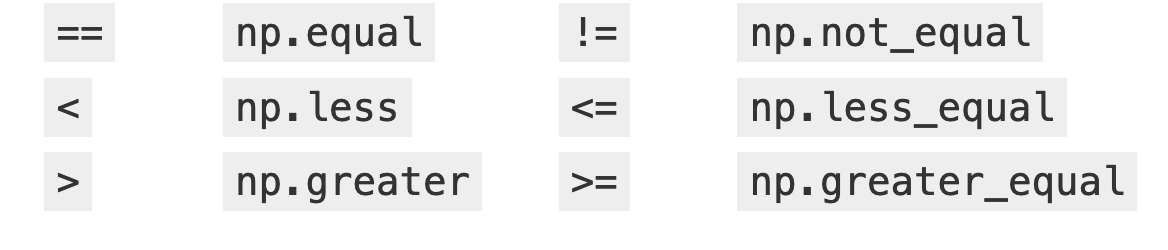

[Boolean Operators](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html#Boolean-operators)

operator|function
-----| -----
`&` | 'and' operator
`\|` | 'or' operator
`\~` | 'not' operator
`\^` | 'xor' operator


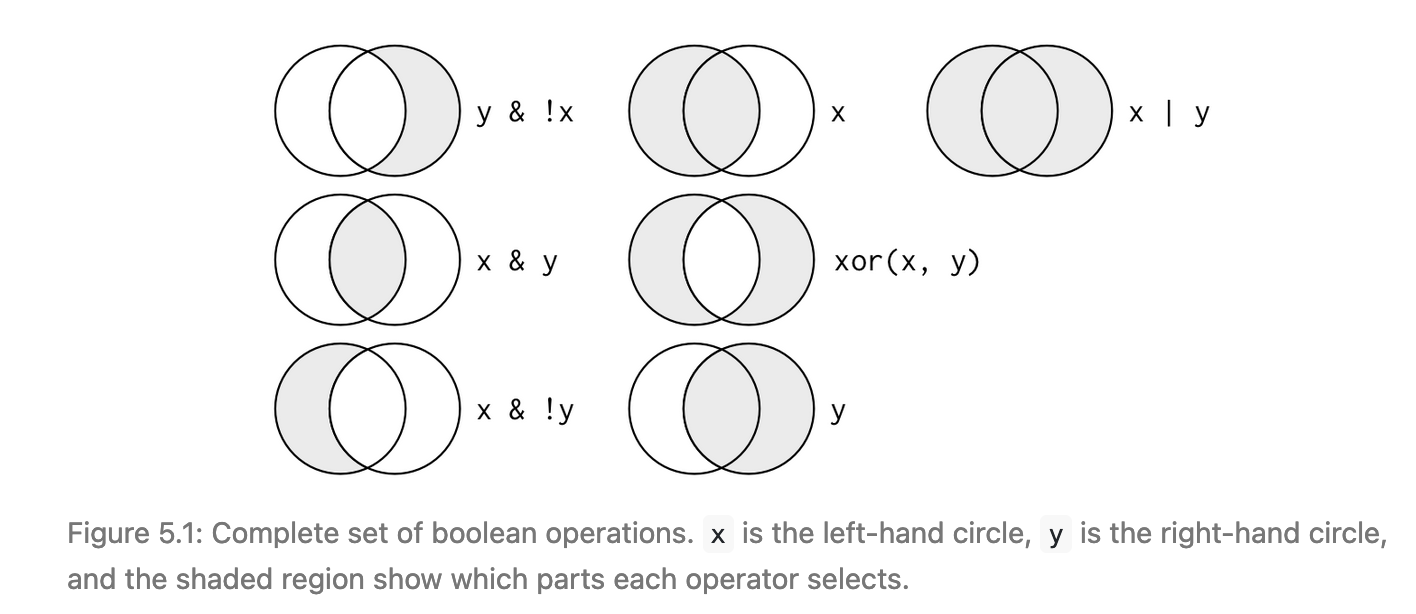

In [14]:
## Let's combine multiple conditions
## in addition to carrier let's use dep_delay comparison
# df[(cond1) & (cond2)]
flights[(flights.carrier == 'UA') & (flights.dep_delay > 3)]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01T11:00:00Z
47,2013,1,1,644.0,636,8.0,931.0,940,-9.0,UA,1701,N75435,EWR,FLL,151.0,1065,6,36,2013-01-01T11:00:00Z
70,2013,1,1,709.0,700,9.0,852.0,832,20.0,UA,1092,N26226,LGA,ORD,135.0,733,7,0,2013-01-01T12:00:00Z
85,2013,1,1,732.0,645,47.0,1011.0,941,30.0,UA,1111,N37456,EWR,MCO,145.0,937,6,45,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336631,2013,9,30,1909.0,1901,8.0,2212.0,2211,1.0,UA,237,N513UA,EWR,SFO,307.0,2565,19,1,2013-09-30T23:00:00Z
336655,2013,9,30,1935.0,1930,5.0,2230.0,2233,-3.0,UA,1115,N38446,EWR,TPA,132.0,997,19,30,2013-09-30T23:00:00Z
336685,2013,9,30,2008.0,1935,33.0,2322.0,2242,40.0,UA,208,N816UA,EWR,SEA,339.0,2402,19,35,2013-09-30T23:00:00Z
336714,2013,9,30,2035.0,2029,6.0,2318.0,2337,-19.0,UA,1039,N78524,EWR,AUS,191.0,1504,20,29,2013-10-01T00:00:00Z


## Missing Values

[Missing Values in Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)

In [15]:
## let's use .isnull to see how pandas is handling missing values
## also use notnull for a column to find all the observations with valid values 
## in that column

In [16]:
flights.isnull()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,False,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False
336772,False,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False
336773,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False
336774,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False


In [17]:
flights.notnull()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,True,True,True,False,True,False,False,True,False,True,True,False,True,True,False,True,True,True,True
336772,True,True,True,False,True,False,False,True,False,True,True,False,True,True,False,True,True,True,True
336773,True,True,True,False,True,False,False,True,False,True,True,True,True,True,False,True,True,True,True
336774,True,True,True,False,True,False,False,True,False,True,True,True,True,True,False,True,True,True,True


In [18]:
# dropna() will drop all rows in which any null value is present:
flights.dropna()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-10-01T02:00:00Z
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-10-01T02:00:00Z
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-10-01T02:00:00Z
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-10-01T02:00:00Z


In [19]:
# you can drop NA values along a different axis; axis=1 drops all columns containing a null value:
flights.dropna(axis='columns')

,year,month,day,sched_dep_time,sched_arr_time,carrier,flight,origin,dest,distance,hour,minute,time_hour
0,2013,1,1,515,819,UA,1545,EWR,IAH,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,529,830,UA,1714,LGA,IAH,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,540,850,AA,1141,JFK,MIA,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,545,1022,B6,725,JFK,BQN,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,600,837,DL,461,LGA,ATL,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,1455,1634,9E,3393,JFK,DCA,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,2200,2312,9E,3525,LGA,SYR,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,1210,1330,MQ,3461,LGA,BNA,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,1159,1344,MQ,3572,LGA,CLE,419,11,59,2013-09-30T15:00:00Z


In [ ]:
# For finer-grained control, the thresh parameter lets you specify 
# a minimum number of non-null values for the row/column to be kept

In [ ]:
#Sometimes rather than dropping NA values, you'd rather replace them with a valid value. 
# This value might be a single number like zero 
#   ==> e.g., flights.fillna(0)
# or it might be some sort of imputation or interpolation from the good values. 
# # forward-fill
# # flights.fillna(method='ffill')
# # backward-fill
# # flights.fillna(method='bfill')

# not very useful in this case, so let's skip

## index of a dataframe

[Pandas - Documentation - Indexing and selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

__Why indexing data?__

- identifying observations
- Allows intuitive subseting

__.loc__
- Label based
- will raise error if the item is not found.

__.iloc__

- Integer position based
- will raise an error if the indexer is out-of-bounds. (slicer allow this)


__Examples__

In [20]:
## we can also use loc and iloc to subset columns
flights.loc[np.arange(6), ['carrier', 'dep_delay']]

,carrier,dep_delay
0,UA,2.0
1,UA,4.0
2,AA,2.0
3,B6,-1.0
4,DL,-6.0
5,UA,-4.0


In [21]:
## iloc version
flights.iloc[np.arange(6), [9, 5]]

,carrier,dep_delay
0,UA,2.0
1,UA,4.0
2,AA,2.0
3,B6,-1.0
4,DL,-6.0
5,UA,-4.0


In [23]:
## note that iloc would give an error
#flights.iloc[:, ['carrier', 'dep_delay']]

## Sorting Values

In [26]:
## let's sort dep_delay column
# flights.dep_delay.sort_values(ascending = False)
flights['dep_delay'].sort_values(ascending = False)
#flights['dep_delay'].sort_values()

7072      1301.0
235778    1137.0
8239      1126.0
327043    1014.0
270376    1005.0
           ...  
336771       NaN
336772       NaN
336773       NaN
336774       NaN
336775       NaN
Name: dep_delay, Length: 336776, dtype: float64

In [27]:
## Use ascending parameter to reverse the ordering 
flights.dep_delay.sort_values()

89673    -43.0
113633   -33.0
64501    -32.0
9619     -30.0
24915    -27.0
          ... 
336771     NaN
336772     NaN
336773     NaN
336774     NaN
336775     NaN
Name: dep_delay, Length: 336776, dtype: float64

## Counting Values

In [28]:
## How many times a carrier make flights.
flights.carrier.value_counts()

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

In [29]:
## We can use "dropna" to count missing values
flights.dep_delay.value_counts(dropna = True)

-5.0      24821
-4.0      24619
-3.0      24218
-2.0      21516
-6.0      20701
          ...  
 545.0        1
 443.0        1
 800.0        1
 911.0        1
 422.0        1
Name: dep_delay, Length: 527, dtype: int64

In [30]:
flights.dep_delay.value_counts(dropna = True, bins = 15)

(-44.345, 46.6]     293915
(46.6, 136.2]        27034
(136.2, 225.8]        5653
(225.8, 315.4]        1433
(315.4, 405.0]         361
(405.0, 494.6]          64
(494.6, 584.2]          17
(763.4, 853.0]          15
(584.2, 673.8]          12
(673.8, 763.4]           6
(853.0, 942.6]           5
(942.6, 1032.2]          3
(1121.8, 1211.4]         2
(1211.4, 1301.0]         1
(1032.2, 1121.8]         0
Name: dep_delay, dtype: int64

In [31]:
# note that the output will be ordered based on counts
edges = [-100, -80, -10,-5, 0, 30, 60, 120, 240, 720]
flights.dep_delay.value_counts(dropna = True, bins = edges)

(-5.0, 0.0]          105680
(-10.0, -5.0]         81940
(0.0, 30.0]           80141
(30.0, 60.0]          21710
(60.0, 120.0]         16858
(-80.0, -10.0]        12469
(120.0, 240.0]         8199
(240.0, 720.0]         1495
(-100.001, -80.0]         0
Name: dep_delay, dtype: int64

<AxesSubplot:>

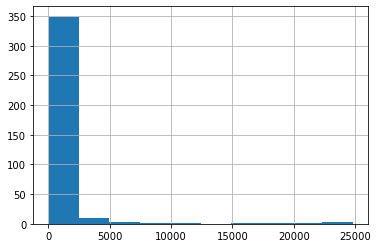

In [32]:
flights.dep_delay.value_counts(dropna = True).loc[lambda x : x>4].hist(bins = 10)

In [34]:
## we can directly use nunique and unique to count unique values in a column
no_of_cars = flights.carrier.nunique()
no_of_cars

16

In [35]:
flights.carrier.unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

## Summary Information: Revisited

In [36]:
## let's see the basic summary statistics for ['dep_delay', 'arr_time', 'arr_delay']
flights[['dep_delay', 'arr_time', 'arr_delay']].describe()

,dep_delay,arr_time,arr_delay
count,328521.000000,328063.000000,327346.000000
mean,12.639070,1502.054999,6.895377
std,40.210061,533.264132,44.633292
min,-43.000000,1.000000,-86.000000
25%,-5.000000,1104.000000,-17.000000
50%,-2.000000,1535.000000,-5.000000
75%,11.000000,1940.000000,14.000000
max,1301.000000,2400.000000,1272.000000


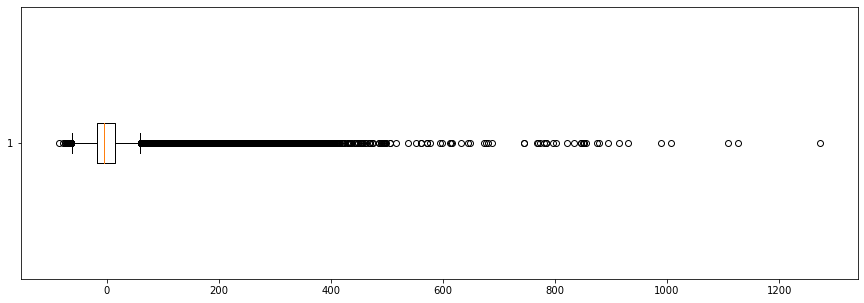

In [37]:
## Let's visualize this
arr_delay = flights.arr_delay.dropna().values
plt.figure(figsize = (15, 5))
plt.boxplot(arr_delay, vert = False)
plt.show()

In [38]:
arr_delay = flights.arr_delay.dropna().values
arr_delay

array([ 11.,  20.,  33., ..., -16.,   1., -25.])

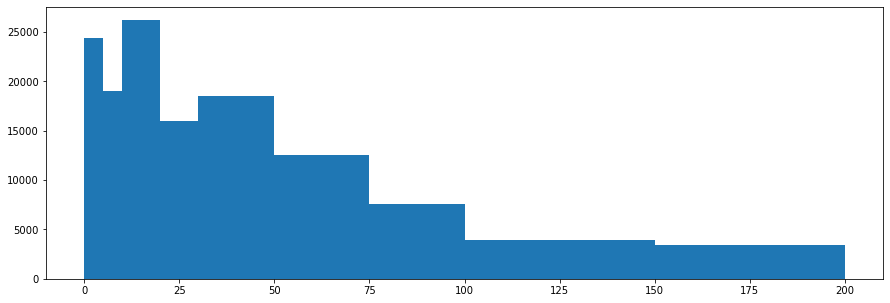

In [39]:
plt.figure(figsize = (15, 5))
plt.hist(arr_delay,bins=[0, 5, 10, 20, 30, 50, 75, 100, 120, 150, 200])
plt.show()

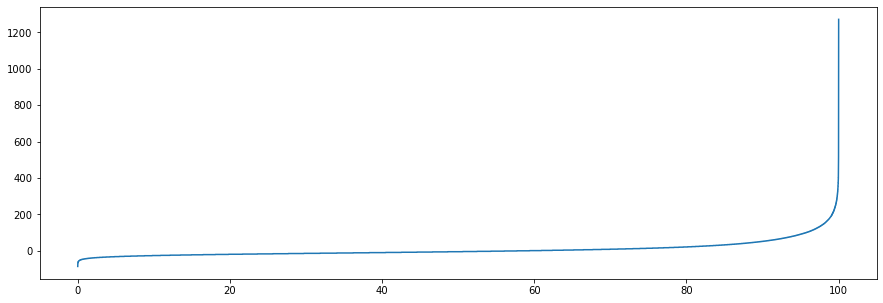

In [40]:
# let's plot sorted values of arr_delay between x = 0 (where min arr_delay occurs) and x = 100 (where max arr_delay happens)
x = np.arange(len(arr_delay)) / len(arr_delay)*100
plt.figure(figsize = (15, 5))
plt.plot(x,np.sort(arr_delay))
plt.show()

In [41]:
## we can also use .quantile method to find a value of the quantile
flights.arr_delay.quantile(0.5)

-5.0

In [42]:
flights.arr_delay.quantile(0.80)

21.0

In [43]:
flights.arr_delay.quantile(0.75)

14.0

In [44]:
## We can use other summary statistics
## max
flights.arr_delay.max()

1272.0

In [45]:
## min
flights.arr_delay.min()

-86.0

In [46]:
## std

flights.arr_delay.std()

44.63329169019526

In [47]:
## variance
flights.arr_delay.var()

1992.130727102053

## Group_By method: Basics

In [48]:
monthly_mean_dep_delays = flights.groupby(['month']).dep_delay.mean()
monthly_mean_dep_delays

month
1     10.036665
2     10.816843
3     13.227076
4     13.938038
5     12.986859
6     20.846332
7     21.727787
8     12.611040
9      6.722476
10     6.243988
11     5.435362
12    16.576688
Name: dep_delay, dtype: float64

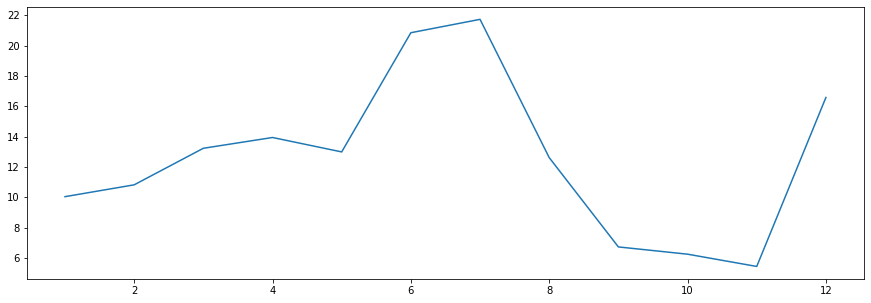

In [49]:
plt.figure(figsize = (15, 5))
plt.plot(monthly_mean_dep_delays)
plt.show()

In [50]:
## Let's group the flights data with day column
## and take a look at total delays happened for each day
daily_total_dep_delays = flights.groupby(['day']).dep_delay.sum()
daily_total_dep_delays

day
1     152923.0
2     149032.0
3     120027.0
4      63553.0
5      83151.0
6      75236.0
7     152956.0
8     225224.0
9     150313.0
10    195669.0
11    173956.0
12    161370.0
13    147408.0
14     97546.0
15     77001.0
16     94331.0
17    148707.0
18    166157.0
19    165203.0
20     94231.0
21    100697.0
22    206600.0
23    183579.0
24    164416.0
25    160238.0
26    104908.0
27    131389.0
28    164123.0
29     84107.0
30    100568.0
31     57581.0
Name: dep_delay, dtype: float64

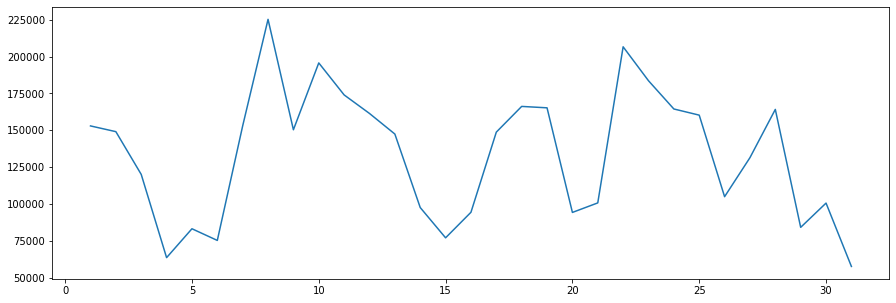

In [51]:
plt.figure(figsize = (15, 5))
plt.plot(daily_total_dep_delays)
plt.show()

__Under the hood__ <br>



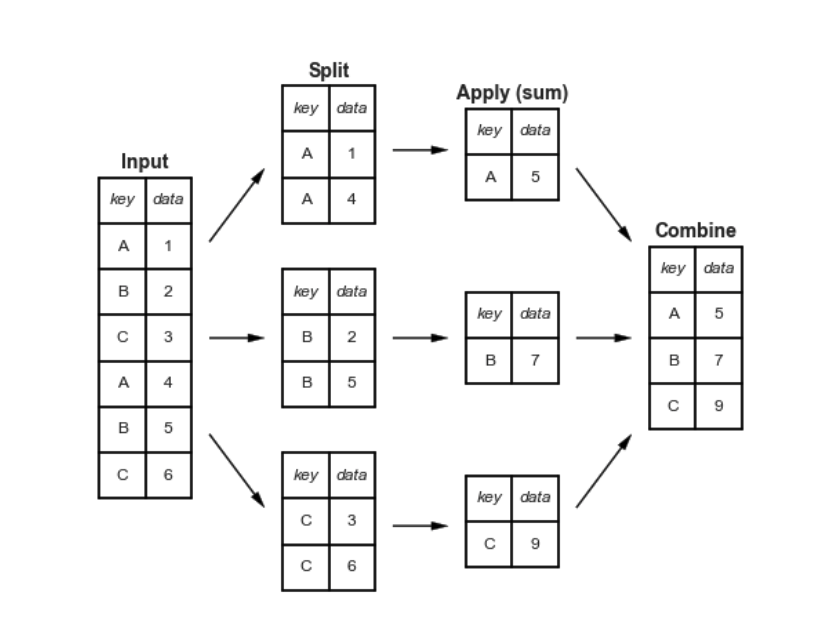

[Figure Source](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#Split,-apply,-combine)

In [52]:
## Group Flights by destination and
## take a look at the average delay for each day of the month
delays_destination = flights.groupby('dest').dep_delay.mean()
delays_destination

dest
ABQ    13.740157
ACK     6.456604
ALB    23.620525
ANC    12.875000
ATL    12.509824
         ...    
TPA    12.135007
TUL    34.906355
TVC    22.083333
TYS    28.493955
XNA     6.464886
Name: dep_delay, Length: 105, dtype: float64

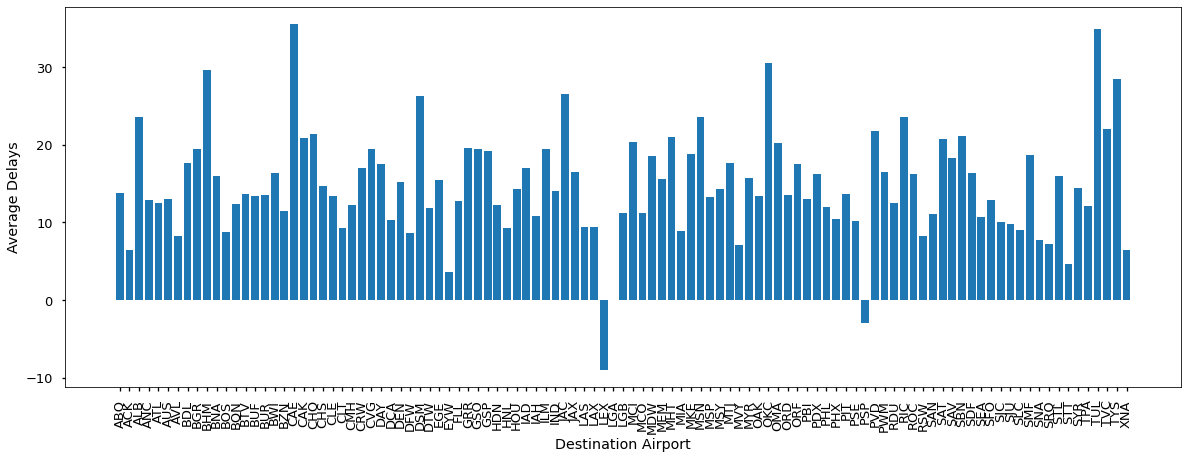

In [53]:
## Let's visualize this
# change the style if you wish
plt.style.use('seaborn-talk')

# figure size
plt.figure(figsize = (20, 7))

# Histogram
plt.bar(delays_destination.index, delays_destination.values)

# x-label
plt.xlabel('Destination Airport')

# y-label
plt.ylabel('Average Delays')

# x_ticks
plt.xticks(rotation = 90)

# Show
plt.show()

In [54]:
## let's take a look at the destinations with 
## avg delay is more than 25
delays_destination[delays_destination >25]

dest
BHM    29.694853
CAE    35.570093
DSM    26.232955
JAC    26.545455
OKC    30.568807
TUL    34.906355
TYS    28.493955
Name: dep_delay, dtype: float64

Do you see any pattern?

__BHM__: [Birmingham-AL](https://goo.gl/maps/9UHiEJxrjQCZkbim7)

__CAE__: [Columbia-SC](https://goo.gl/maps/HzF1ZSQyWz4LoxTi6)

__DSM__: [Des Moines - IO](https://goo.gl/maps/3EgkwDpfYKo6Yngv5)

__JAC__: [Jackson - WY](https://goo.gl/maps/CESs8scrCM5GWAda8)

__OKC__: [Oklahoma City - OK](https://goo.gl/maps/DfUEo7r9tV3FEzKq7)

__TUL__: [Tulsa - OK](https://goo.gl/maps/xuArw3CEjHh4zh5R6)

__TYS__: [Knoxville - TN](https://goo.gl/maps/5cyYPi2xZhdiADkDA)


## Aggregation

- I would like to hypothesize that these airports have less air-traffic then some other airports. To be able to see this, I need to group my data with `destinations` and then take the `mean` of `dep_delay` and `count` of `dest`.

- To achieve our goal quickly we can use `aggregate` method.

In [55]:
## First create a agg_dictionary
agg_dictionary = {'dest': 'count', 'dep_delay': 'mean'}

## use the dictionary we created above in .aggregate method
flights.groupby('dest').aggregate(agg_dictionary)

,dest,dep_delay
dest,,
ABQ,254,13.740157
ACK,265,6.456604
ALB,439,23.620525
ANC,8,12.875000
ATL,17215,12.509824
...,...,...
TPA,7466,12.135007
TUL,315,34.906355
TVC,101,22.083333


__Let's check our hypothesis:__

In [56]:
## store the resulting dataframe above in a variable aggregated_df
aggregated_df = flights.groupby('dest').aggregate(agg_dictionary)

## check the values with destinations with more than 25mins average delay
print(aggregated_df[aggregated_df.dep_delay >25])

      dest  dep_delay
dest                 
BHM    297  29.694853
CAE    116  35.570093
DSM    569  26.232955
JAC     25  26.545455
OKC    346  30.568807
TUL    315  34.906355
TYS    631  28.493955


In [57]:
## Note that the count is 631 for the TYS 
## see how many other destinations have less than this value
## as their flights count.
aggregated_df[aggregated_df.dest >631].shape

(68, 2)

68 of the 105 destinations had more flights from NYC airports than the destinations of those fligths with more than 25 mins average delay_time. 

### Aggregation and naming columns of the resulting table

In [58]:
## note that the following code is not working
aggregated_df.sort_values(by = 'dest')

ValueError: 'dest' is both an index level and a column label, which is ambiguous.

Proper way of aggregation


In [59]:
grouped_by_dest = flights.groupby('dest').agg(
    flight_counts = ('dest', 'count') , 
    delay_mean= ('dep_delay', 'mean') ,
    distance_mean = ('distance', 'mean')
    )
grouped_by_dest

,flight_counts,delay_mean,distance_mean
dest,,,
ABQ,254,13.740157,1826.000000
ACK,265,6.456604,199.000000
ALB,439,23.620525,143.000000
ANC,8,12.875000,3370.000000
ATL,17215,12.509824,757.108220
...,...,...,...
TPA,7466,12.135007,1003.935575
TUL,315,34.906355,1215.000000
TVC,101,22.083333,652.386139


### User defined functions

Finally we can use user-defined functions for aggregation

In [60]:
# define my_avg_funct
def my_avg_cost(x):
    return x.mean()*20.0

In [61]:
# let's use my_avg_func instead of 'mean'
grouped_by_dest = flights.groupby('dest').agg(
    flight_counts = ('dest', 'count') , 
    delay_mean= ('dep_delay', 'mean') ,
    average_cost = ('distance', my_avg_cost)
    )
grouped_by_dest

,flight_counts,delay_mean,average_cost
dest,,,
ABQ,254,13.740157,36520.000000
ACK,265,6.456604,3980.000000
ALB,439,23.620525,2860.000000
ANC,8,12.875000,67400.000000
ATL,17215,12.509824,15142.164392
...,...,...,...
TPA,7466,12.135007,20078.711492
TUL,315,34.906355,24300.000000
TVC,101,22.083333,13047.722772


In [ ]:
## we can also use built-in functions from other libraries
## especially from numpy

## Grouping by multiple variables

In [65]:
multiple_grouped = flights.groupby(['origin', 'dest']).dep_delay.mean()

multiple_grouped.reset_index()

,origin,dest,dep_delay
0,EWR,ALB,23.620525
1,EWR,ANC,12.875000
2,EWR,ATL,15.501738
3,EWR,AUS,11.508863
4,EWR,AVL,8.616601
...,...,...,...
219,LGA,SYR,19.110701
220,LGA,TPA,11.287324
221,LGA,TVC,23.410959
222,LGA,TYS,12.705660


Now we can access a group by usign its multiple index:

In [64]:
multiple_grouped[('EWR', 'AUS')]

11.508863399374349

## Filtering

A filtering operation allows you to drop data based on the group properties. 

In [66]:
## define a function that checks whether for a given group the mean delay time is 
## more than 25 mins
def my_delay_funct(group):
    return group.dep_delay.mean() > 25

In [67]:
## use my_delay_funct to filter the original dataframe
filtered_by_delay = flights.groupby(['dest']).filter(my_delay_funct)
filtered_by_delay

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
152,2013,1,1,848.0,851,-3.0,1155.0,1136,19.0,UA,1741,N27724,EWR,JAC,275.0,1874,8,51,2013-01-01T13:00:00Z
733,2013,1,1,1952.0,1930,22.0,2358.0,2207,NaN,EV,4333,N11194,EWR,TUL,NaN,1215,19,30,2013-01-02T00:00:00Z
742,2013,1,1,2000.0,1930,30.0,2255.0,2140,75.0,EV,4361,N12567,EWR,TYS,138.0,631,19,30,2013-01-02T00:00:00Z
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,2013-01-02T00:00:00Z
803,2013,1,1,2119.0,1930,109.0,2358.0,2136,142.0,EV,4543,N13123,EWR,DSM,200.0,1017,19,30,2013-01-02T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336659,2013,9,30,1939.0,1950,-11.0,2112.0,2141,-29.0,EV,5038,N713EV,LGA,BHM,112.0,866,19,50,2013-09-30T23:00:00Z
336677,2013,9,30,2000.0,2007,-7.0,2142.0,2202,-20.0,EV,4543,N11194,EWR,DSM,138.0,1017,20,7,2013-10-01T00:00:00Z
336707,2013,9,30,2031.0,2040,-9.0,2228.0,2300,-32.0,9E,4033,N8924B,LGA,TYS,86.0,647,20,40,2013-10-01T00:00:00Z
336731,2013,9,30,2059.0,2003,56.0,2311.0,2237,34.0,EV,4204,N11127,EWR,OKC,166.0,1325,20,3,2013-10-01T00:00:00Z


Note that this is not equal to getting all flights whose delay time is more than 25 mins.

In [68]:
# return all the flights with more than 25 mins delay
flights[flights.dep_delay > 25]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
85,2013,1,1,732.0,645,47.0,1011.0,941,30.0,UA,1111,N37456,EWR,MCO,145.0,937,6,45,2013-01-01T11:00:00Z
96,2013,1,1,749.0,710,39.0,939.0,850,49.0,MQ,3737,N508MQ,EWR,ORD,148.0,719,7,10,2013-01-01T12:00:00Z
119,2013,1,1,811.0,630,101.0,1047.0,830,137.0,MQ,4576,N531MQ,LGA,CLT,118.0,544,6,30,2013-01-01T11:00:00Z
135,2013,1,1,826.0,715,71.0,1136.0,1045,51.0,AA,443,N3GVAA,JFK,MIA,160.0,1089,7,15,2013-01-01T12:00:00Z
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01T23:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336757,2013,9,30,2159.0,1845,194.0,2344.0,2030,194.0,9E,3320,N906XJ,JFK,BUF,50.0,301,18,45,2013-09-30T22:00:00Z
336759,2013,9,30,2207.0,2140,27.0,2257.0,2250,7.0,MQ,3660,N532MQ,LGA,BNA,97.0,764,21,40,2013-10-01T01:00:00Z
336760,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872,20,59,2013-10-01T00:00:00Z
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-10-01T01:00:00Z


In [69]:
## note that in filtered_by_delay there are some observations that have delay time less than 25 mins.
filtered_by_delay[filtered_by_delay.dep_delay <25]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
152,2013,1,1,848.0,851,-3.0,1155.0,1136,19.0,UA,1741,N27724,EWR,JAC,275.0,1874,8,51,2013-01-01T13:00:00Z
733,2013,1,1,1952.0,1930,22.0,2358.0,2207,NaN,EV,4333,N11194,EWR,TUL,NaN,1215,19,30,2013-01-02T00:00:00Z
1067,2013,1,2,900.0,859,1.0,1146.0,1144,2.0,UA,1741,N23708,EWR,JAC,258.0,1874,8,59,2013-01-02T13:00:00Z
1642,2013,1,2,1921.0,1909,12.0,2143.0,2115,28.0,EV,4543,N34110,EWR,DSM,180.0,1017,19,9,2013-01-03T00:00:00Z
1672,2013,1,2,1954.0,2000,-6.0,2241.0,2216,25.0,9E,4033,N8516C,LGA,TYS,121.0,647,20,0,2013-01-03T01:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336605,2013,9,30,1852.0,1900,-8.0,2100.0,2104,-4.0,9E,3445,N909XJ,LGA,DSM,137.0,1031,19,0,2013-09-30T23:00:00Z
336644,2013,9,30,1928.0,1932,-4.0,2137.0,2143,-6.0,EV,4361,N18556,EWR,TYS,82.0,631,19,32,2013-09-30T23:00:00Z
336659,2013,9,30,1939.0,1950,-11.0,2112.0,2141,-29.0,EV,5038,N713EV,LGA,BHM,112.0,866,19,50,2013-09-30T23:00:00Z
336677,2013,9,30,2000.0,2007,-7.0,2142.0,2202,-20.0,EV,4543,N11194,EWR,DSM,138.0,1017,20,7,2013-10-01T00:00:00Z


In [71]:
## when we use groupby method pandas returns a groupby object
grouped = flights.groupby('dest')
grouped

In [72]:
## note that result is a dataframe
print(type(grouped.get_group('CAE')))

<class 'pandas.core.frame.DataFrame'>


In [73]:
grouped.get_group('CAE')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2511,2013,1,3,1843.0,1828,15.0,2102.0,2026,36.0,EV,4410,N21537,EWR,CAE,105.0,602,18,28,2013-01-03T23:00:00Z
5000,2013,1,6,1839.0,1836,3.0,2118.0,2031,47.0,EV,4437,N15912,EWR,CAE,115.0,602,18,36,2013-01-06T23:00:00Z
8654,2013,1,10,1827.0,1828,-1.0,2031.0,2026,5.0,EV,4410,N18557,EWR,CAE,89.0,602,18,28,2013-01-10T23:00:00Z
11163,2013,1,13,1958.0,1836,82.0,2231.0,2031,120.0,EV,4437,N16571,EWR,CAE,98.0,602,18,36,2013-01-13T23:00:00Z
14837,2013,1,17,2004.0,1828,96.0,2227.0,2026,121.0,EV,4410,N13553,EWR,CAE,116.0,602,18,28,2013-01-17T23:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322546,2013,9,15,1807.0,1810,-3.0,2044.0,2007,37.0,EV,4278,N11547,EWR,CAE,89.0,602,18,10,2013-09-15T22:00:00Z
326428,2013,9,19,1809.0,1757,12.0,1955.0,1954,1.0,EV,4410,N11192,EWR,CAE,79.0,602,17,57,2013-09-19T21:00:00Z
329047,2013,9,22,1805.0,1810,-5.0,2021.0,2007,14.0,EV,4278,N16951,EWR,CAE,98.0,602,18,10,2013-09-22T22:00:00Z
333052,2013,9,26,1911.0,1745,86.0,2124.0,1942,102.0,EV,4410,N12900,EWR,CAE,85.0,602,17,45,2013-09-26T21:00:00Z


In [74]:
## now we can check the average dep_delay time for this group is bigger than 25 or not
grouped.get_group('CAE').dep_delay.mean() > 25

True

In [ ]:
## the average dep_delay is more than 25
## therefore observations that belong to 'CAE' group will be returned after we filter the dataframe

In [75]:
## in fact we know from our previous work that the destinations with more than 25 mins 
## delay are ['JAC', 'TUL', 'DSM', 'OKC', 'TYS', 'BHM', 'CAE' ]
## therefore the filtering above is equivalent to the code below but more convenient
flights[flights.dest.isin(['JAC', 'TUL', 'DSM', 'OKC', 'TYS', 'BHM', 'CAE' ])]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
152,2013,1,1,848.0,851,-3.0,1155.0,1136,19.0,UA,1741,N27724,EWR,JAC,275.0,1874,8,51,2013-01-01T13:00:00Z
733,2013,1,1,1952.0,1930,22.0,2358.0,2207,NaN,EV,4333,N11194,EWR,TUL,NaN,1215,19,30,2013-01-02T00:00:00Z
742,2013,1,1,2000.0,1930,30.0,2255.0,2140,75.0,EV,4361,N12567,EWR,TYS,138.0,631,19,30,2013-01-02T00:00:00Z
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,2013-01-02T00:00:00Z
803,2013,1,1,2119.0,1930,109.0,2358.0,2136,142.0,EV,4543,N13123,EWR,DSM,200.0,1017,19,30,2013-01-02T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336659,2013,9,30,1939.0,1950,-11.0,2112.0,2141,-29.0,EV,5038,N713EV,LGA,BHM,112.0,866,19,50,2013-09-30T23:00:00Z
336677,2013,9,30,2000.0,2007,-7.0,2142.0,2202,-20.0,EV,4543,N11194,EWR,DSM,138.0,1017,20,7,2013-10-01T00:00:00Z
336707,2013,9,30,2031.0,2040,-9.0,2228.0,2300,-32.0,9E,4033,N8924B,LGA,TYS,86.0,647,20,40,2013-10-01T00:00:00Z
336731,2013,9,30,2059.0,2003,56.0,2311.0,2237,34.0,EV,4204,N11127,EWR,OKC,166.0,1325,20,3,2013-10-01T00:00:00Z


## Transform Method

Pandas.Series objects supports vectorized operations.

In [76]:
flights['speed_per_hour'] = flights.distance/flights.air_time*60

In [77]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed_per_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,370.044053
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,374.273128
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,408.375000
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,516.721311
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,394.137931


Now let's compare each observation with the mean of their destination group.

In [78]:
def speed_func(group):
    return group - group.mean()

In [79]:
flights['speed_dif_from_group'] = flights.groupby('dest')['speed_per_hour'].transform(speed_func)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed_per_hour,speed_dif_from_group
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,370.044053,-59.107943
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,374.273128,-54.878868
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,408.375000,-21.458001
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,516.721311,29.549375
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,394.137931,-11.044173


__Transforming Missing Values with Group Mean__

In [80]:
def my_filling_func(group):
    m = group.mean()
    if np.isnan(m):
        return -9999
    else:
        return group.fillna(m)

In [81]:
flights['air_time'] = flights.groupby('dest')['air_time'].transform(my_filling_func)
flights.tail(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed_per_hour,speed_dif_from_group
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,114.382150,764,12,10,2013-09-30T16:00:00Z,NaN,NaN
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,69.337278,419,11,59,2013-09-30T15:00:00Z,NaN,NaN
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,...,N839MQ,LGA,RDU,70.885328,431,8,40,2013-09-30T12:00:00Z,NaN,NaN


another transform example

In [82]:
def relative_contribution_to_total_delay(group):
    return group/group.sum()

In [83]:
flights['dep_delay_relative_transform'] = flights.groupby(['origin', 'dest', 'month', 'day'])['dep_delay'].transform(relative_contribution_to_total_delay) 
flights.head(13)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,speed_per_hour,speed_dif_from_group,dep_delay_relative_transform
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,370.044053,-59.107943,0.068966
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,374.273128,-54.878868,0.028777
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,408.375000,-21.458001,0.020833
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,516.721311,29.549375,0.250000
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,394.137931,-11.044173,0.125000
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z,287.600000,-93.530263,-0.027972
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,EWR,FLL,158.0,1065,6,0,2013-01-01T11:00:00Z,404.430380,-19.887227,-0.045872
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,LGA,IAD,53.0,229,6,0,2013-01-01T11:00:00Z,259.245283,-25.856593,0.230769
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,JFK,MCO,140.0,944,6,0,2013-01-01T11:00:00Z,404.571429,-17.814101,0.125000
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,...,LGA,ORD,138.0,733,6,0,2013-01-01T11:00:00Z,318.695652,-62.434611,0.500000


# Lab

Using the flights dataframe, display all the flights

1. Had an arrival delay of two or more hours.

2. Flew to Houston (IAH or HOU)

3. Were operated by American, Delta

4. How many values are missing in `dep_time`?

5. Sort `flight` to find fastest flight.


answer the following questions

6. Which flights travelled the shortest?

7. When do the first and last flights leave each day?

8. When there is a missing value in `dep_time` then this is an indication of canceled flight. Find the number of cancelled flights for each (`carrier`, `origin`) combination.

9. Which carrier has the worst `dep_delay`s? 

10. Which plane (`tailnum`) has the worst on-time record?

11. For each plane, count the number of flights before the first delay of greater than 1 hour.